In [3]:
# ----------------------------
# Prediction of Household Power Consumption
# ----------------------------

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------
# Step 1: Load Dataset
# ----------------------------
df = pd.read_csv('Household_Power_Consumption_Prediction.csv')

# Display first few rows
print(df.head())

# ----------------------------
# Step 2: Data Preprocessing
# ----------------------------
# Replace missing values
df.replace('?', np.nan, inplace=True)
df = df.dropna()

# Convert data types
df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] = df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)
df['Sub_metering_3'] = df['Sub_metering_3'].astype(float)

# Combine Date and Time into one DateTime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop unnecessary columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# ----------------------------
# Step 3: Feature Engineering
# ----------------------------
# Extract hour and day features
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month

# ----------------------------
# Step 4: Define Features and Target
# ----------------------------
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Hour', 'Day', 'Month']]
y = df['Global_active_power']

# ----------------------------
# Step 5: Split Data
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------------------
# Step 6: Train Models
# ----------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# ----------------------------
# Step 7: Display Results
# ----------------------------
results_df = pd.DataFrame(results).T
print("\nModel Performance:\n", results_df)

# ----------------------------
# Step 8: Visualization
# ----------------------------
plt.figure(figsize=(8,6))
sns.barplot(x=results_df.index, y=results_df['R2'])
plt.title("Model Comparison based on R² Score")
plt.ylabel("R² Score")
plt.show()

# ----------------------------
# Step 9: Conclusion
# ----------------------------
best_model = max(results, key=lambda x: results[x]['R2'])
print(f"\n✅ Best Performing Model: {best_model}")


             timestamp  hour  dayofweek  is_weekend  outdoor_temp_c  \
0  2025-01-01 00:00:00     0          2           0           31.60   
1  2025-01-01 01:00:00     1          2           0           29.39   
2  2025-01-01 02:00:00     2          2           0           28.78   
3  2025-01-01 03:00:00     3          2           0           28.27   
4  2025-01-01 04:00:00     4          2           0           24.72   

   humidity_pct  appliances_on_score  is_holiday  consumption_kwh  
0          58.8                 0.10           0            1.047  
1          64.6                 0.08           0            0.871  
2          65.9                 0.28           0            1.039  
3          68.2                 0.00           0            0.926  
4          72.4                 0.00           0            0.731  


KeyError: 'Global_active_power'

In [4]:
df = pd.read_csv('household_power_consumption.txt', sep=';',
                 parse_dates={'dt':['Date','Time']}, infer_datetime_format=True, na_values='?')
df.set_index('dt', inplace=True)
print(df.shape)
df.head()


C:\Users\manoj\AppData\Local\Temp\ipykernel_15952\4000217523.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';',


FileNotFoundError: [Errno 2] No such file or directory: 'household_power_consumption.txt'

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import warnings

# Suppress minor warnings for cleaner output
warnings.filterwarnings("ignore")

# 1. Load the dataset
# The data is accessed using the uploaded file name
try:
    df = pd.read_csv('Household_Power_Consumption_Prediction.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Household_Power_Consumption_Prediction.csv not found.")
    exit()

# Display initial information
print("\n--- Initial Data Info ---")
df.info()

# 2. Data Preprocessing and Feature Selection

# Check for and handle missing values (if any)
if df.isnull().values.any():
    print("\nWarning: Missing values detected. Filling with median for simplicity.")
    # For a real-world project, a more sophisticated imputation strategy might be needed
    for col in df.select_dtypes(include=np.number).columns:
        df[col].fillna(df[col].median(), inplace=True)
else:
    print("\nNo missing values found.")

# Drop the 'timestamp' column. We use the extracted temporal features:
# 'hour', 'dayofweek', and 'is_weekend' for this regression model.
df_processed = df.drop('timestamp', axis=1)

# Define Features (X) and Target (y)
# The target variable is 'consumption_kwh'
target_column = 'consumption_kwh'
X = df_processed.drop(target_column, axis=1)
y = df_processed[target_column]

print("\nFeatures (X) used for training (First 5 rows):")
print(X.head())

# 3. Data Splitting
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# 4. Model Training (Random Forest Regressor)
print("\n--- Training Random Forest Regressor ---")
# Random Forest is an excellent choice for structured data due to its high accuracy
# and ability to capture non-linear relationships.
model = RandomForestRegressor(
    n_estimators=100,       # Number of trees in the forest
    random_state=42,        # For reproducibility
    n_jobs=-1,              # Use all available cores
    max_depth=15,           # Limit depth to prevent severe overfitting
    min_samples_split=5     # Minimum number of samples required to split an internal node
)

# Train the model
model.fit(X_train, y_train)

print("Training complete.")

# 5. Model Evaluation
print("\n--- Model Evaluation ---")
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f} kWh (Average absolute difference between prediction and actual)")
print(f"R-squared Score (R2): {r2:.4f} (Proportion of variance explained by the model)")

# Analyze Feature Importance
# Feature importance helps understand which factors drive power consumption
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

print("\nTop 5 Feature Importances (Higher is more impactful):")
print(feature_importances_sorted.head())

# 6. Demonstration/Prediction Example
# Take the first example from the test set for a realistic prediction
sample_features = X_test.iloc[0].values.reshape(1, -1)
actual_value = y_test.iloc[0]
predicted_value = model.predict(sample_features)[0]

print("\n--- Prediction Demonstration ---")
print(f"Sample Data Point Features:\n{X_test.iloc[0]}")
print(f"\nActual Consumption: {actual_value:.3f} kWh")
print(f"Predicted Consumption: {predicted_value:.3f} kWh")

Dataset loaded successfully.

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            2160 non-null   object 
 1   hour                 2160 non-null   int64  
 2   dayofweek            2160 non-null   int64  
 3   is_weekend           2160 non-null   int64  
 4   outdoor_temp_c       2160 non-null   float64
 5   humidity_pct         2160 non-null   float64
 6   appliances_on_score  2160 non-null   float64
 7   is_holiday           2160 non-null   int64  
 8   consumption_kwh      2160 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 152.0+ KB

No missing values found.

Features (X) used for training (First 5 rows):
   hour  dayofweek  is_weekend  outdoor_temp_c  humidity_pct  \
0     0          2           0           31.60          58.8   
1     1          2    

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import warnings

# Suppress minor warnings for cleaner output
warnings.filterwarnings("ignore")

# 1. Load the dataset
try:
    df = pd.read_csv('Household_Power_Consumption_Prediction.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Household_Power_Consumption_Prediction.csv not found.")
    exit()

# 2. Data Preprocessing and Feature Selection

# Check for and handle missing values (if any)
if df.isnull().values.any():
    print("\nWarning: Missing values detected. Filling with median for simplicity.")
    # Impute missing numerical values with the median
    for col in df.select_dtypes(include=np.number).columns:
        df[col].fillna(df[col].median(), inplace=True)
else:
    print("\nNo missing values found.")

# Drop the 'timestamp' column as we use extracted temporal features
df_processed = df.drop('timestamp', axis=1)

# Define Features (X) and Target (y)
target_column = 'consumption_kwh'
X = df_processed.drop(target_column, axis=1)
y = df_processed[target_column]

# 3. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# 4. Model Training and Evaluation

# Dictionary to hold the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        max_depth=15,
        min_samples_split=5
    ),
    "Gradient Boosting Regressor": GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}

results = {}

print("\n--- Training and Evaluating Models ---")

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "R2": r2}
    
    print(f"{name} complete. MAE: {mae:.4f}, R2: {r2:.4f}")

# 5. Comparative Summary and Feature Importance (using the best non-linear model)
print("\n" + "="*50)
print("             COMPARATIVE MODEL PERFORMANCE")
print("="*50)

# Convert results to DataFrame for clean display
results_df = pd.DataFrame(results).T
# Sort by R2 score to show the best model first
results_df_sorted = results_df.sort_values(by="R2", ascending=False)

print(results_df_sorted.to_markdown(floatfmt=".4f"))
print("="*50)

# Feature Importance Analysis for the best model (usually Random Forest or Gradient Boosting)
best_model_name = results_df_sorted.index[0]
best_model = models[best_model_name]

if best_model_name != "Linear Regression":
    print(f"\n--- Feature Importance for {best_model_name} ---")
    
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances_sorted = feature_importances.sort_values(ascending=False)
    
    print("\nTop 5 Feature Importances (Higher is more impactful):")
    print(feature_importances_sorted.head().to_markdown(floatfmt=".4f"))

Dataset loaded successfully.

No missing values found.

Training set size: 1728 samples
Testing set size: 432 samples

--- Training and Evaluating Models ---

Training Linear Regression...
Linear Regression complete. MAE: 0.1104, R2: 0.8674

Training Random Forest Regressor...
Random Forest Regressor complete. MAE: 0.0925, R2: 0.9127

Training Gradient Boosting Regressor...
Gradient Boosting Regressor complete. MAE: 0.0902, R2: 0.9140

             COMPARATIVE MODEL PERFORMANCE
|                             |    MAE |     R2 |
|:----------------------------|-------:|-------:|
| Gradient Boosting Regressor | 0.0902 | 0.9140 |
| Random Forest Regressor     | 0.0925 | 0.9127 |
| Linear Regression           | 0.1104 | 0.8674 |

--- Feature Importance for Gradient Boosting Regressor ---

Top 5 Feature Importances (Higher is more impactful):
|                     |      0 |
|:--------------------|-------:|
| hour                | 0.7807 |
| outdoor_temp_c      | 0.0740 |
| appliances_on_scor

Dataset loaded successfully.

No missing values found.

Training set size: 1728 samples
Testing set size: 432 samples

--- Training and Evaluating Models ---

Training Linear Regression...
Linear Regression complete. MAE: 0.1104, R2: 0.8674

Training Random Forest Regressor...
Random Forest Regressor complete. MAE: 0.0925, R2: 0.9127

Training Gradient Boosting Regressor...
Gradient Boosting Regressor complete. MAE: 0.0902, R2: 0.9140

             COMPARATIVE MODEL PERFORMANCE
|                             |    MAE |     R2 |
|:----------------------------|-------:|-------:|
| Gradient Boosting Regressor | 0.0902 | 0.9140 |
| Random Forest Regressor     | 0.0925 | 0.9127 |
| Linear Regression           | 0.1104 | 0.8674 |

--- Generating Visualizations for Gradient Boosting Regressor ---


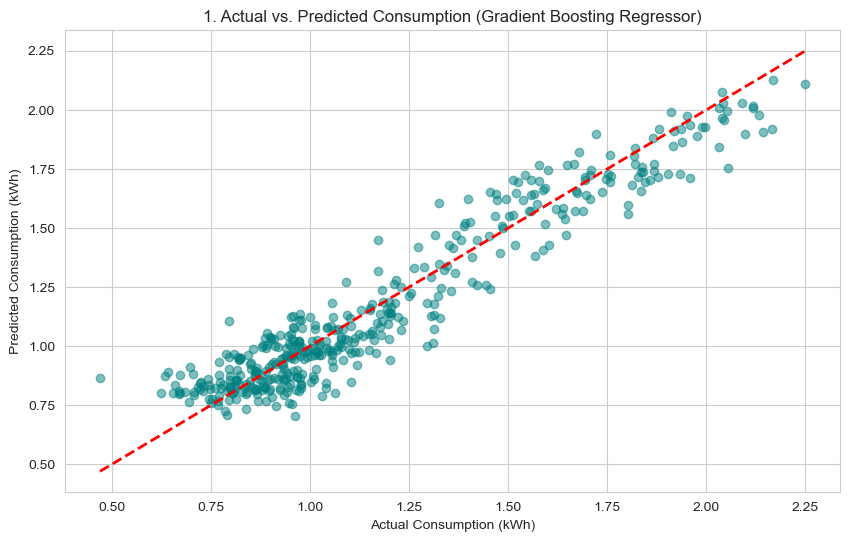

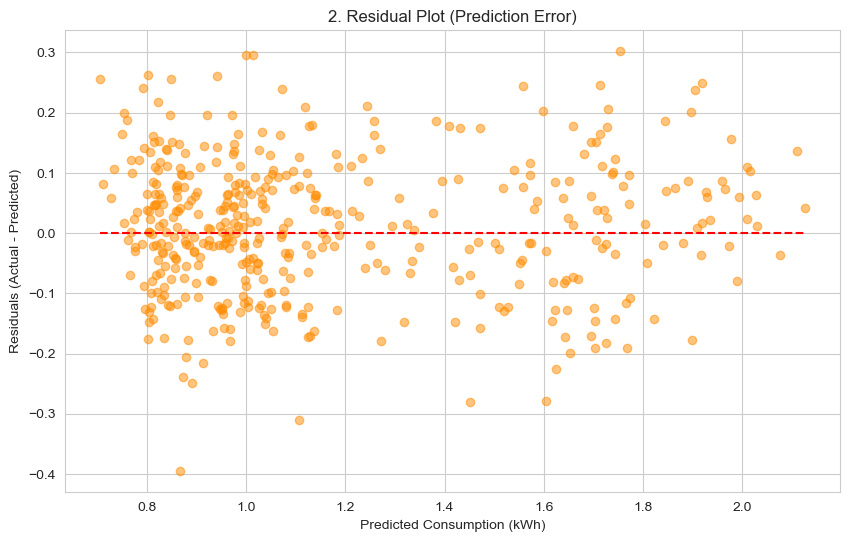


--- Feature Importance for Gradient Boosting Regressor ---

Top 5 Feature Importances (Higher is more impactful):
|                     |      0 |
|:--------------------|-------:|
| hour                | 0.7807 |
| outdoor_temp_c      | 0.0740 |
| appliances_on_score | 0.0555 |
| dayofweek           | 0.0448 |
| is_weekend          | 0.0243 |


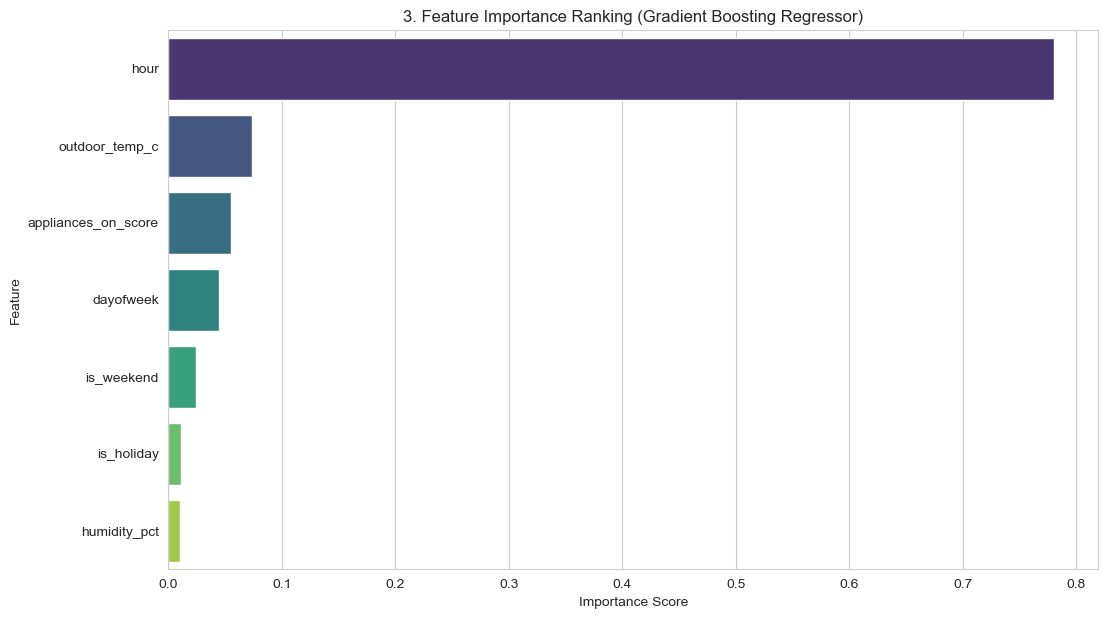

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress minor warnings for cleaner output
warnings.filterwarnings("ignore")

# Set plotting style
sns.set_style("whitegrid")

# 1. Load the dataset
try:
    df = pd.read_csv('Household_Power_Consumption_Prediction.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Household_Power_Consumption_Prediction.csv not found.")
    exit()

# 2. Data Preprocessing and Feature Selection

# Check for and handle missing values (if any)
if df.isnull().values.any():
    print("\nWarning: Missing values detected. Filling with median for simplicity.")
    # Impute missing numerical values with the median
    for col in df.select_dtypes(include=np.number).columns:
        df[col].fillna(df[col].median(), inplace=True)
else:
    print("\nNo missing values found.")

# Drop the 'timestamp' column as we use extracted temporal features
df_processed = df.drop('timestamp', axis=1)

# Define Features (X) and Target (y)
target_column = 'consumption_kwh'
X = df_processed.drop(target_column, axis=1)
y = df_processed[target_column]

# 3. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# 4. Model Training and Evaluation

# Dictionary to hold the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        max_depth=15,
        min_samples_split=5
    ),
    "Gradient Boosting Regressor": GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}

results = {}

print("\n--- Training and Evaluating Models ---")

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "R2": r2, "y_pred": y_pred}
    
    print(f"{name} complete. MAE: {mae:.4f}, R2: {r2:.4f}")

# 5. Comparative Summary and Selection of Best Model
print("\n" + "="*50)
print("             COMPARATIVE MODEL PERFORMANCE")
print("="*50)

results_df = pd.DataFrame({k: v for k, v in results.items()}).T
results_df = results_df.drop('y_pred', axis=1) # Drop y_pred column for clean display
results_df_sorted = results_df.sort_values(by="R2", ascending=False)

print(results_df_sorted.to_markdown(floatfmt=".4f"))
print("="*50)

# Determine the best model for visualization
best_model_name = results_df_sorted.index[0]
best_model = models[best_model_name]
best_y_pred = results[best_model_name]["y_pred"]

# 6. Model Visualization (using the Best Model)
print(f"\n--- Generating Visualizations for {best_model_name} ---")

# --- Plot 1: Actual vs. Predicted Consumption ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'1. Actual vs. Predicted Consumption ({best_model_name})')
plt.xlabel('Actual Consumption (kWh)')
plt.ylabel('Predicted Consumption (kWh)')
plt.show() # 

# --- Plot 2: Residual Plot ---
residuals = y_test - best_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(best_y_pred, residuals, alpha=0.5, color='darkorange')
plt.hlines(0, best_y_pred.min(), best_y_pred.max(), colors='red', linestyles='--')
plt.title(f'2. Residual Plot (Prediction Error)')
plt.xlabel('Predicted Consumption (kWh)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show() # [Image of Residual Plot for Regression]

# --- Plot 3: Feature Importance Bar Chart (if not Linear Regression) ---
if best_model_name != "Linear Regression":
    print(f"\n--- Feature Importance for {best_model_name} ---")
    
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances_sorted = feature_importances.sort_values(ascending=False)
    
    print("\nTop 5 Feature Importances (Higher is more impactful):")
    print(feature_importances_sorted.head().to_markdown(floatfmt=".4f"))

    plt.figure(figsize=(12, 7))
    sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette="viridis")
    plt.title(f'3. Feature Importance Ranking ({best_model_name})')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show() #

Dataset loaded successfully.

No missing values found.

Training set size: 1728 samples
Testing set size: 432 samples
Total features after encoding and scaling: 34

--- Training and Evaluating Models ---

Training Linear Regression...
Linear Regression complete. MAE: 0.0963, R2: 0.9003

Training Random Forest Regressor...
Random Forest Regressor complete. MAE: 0.0925, R2: 0.9101

Training Gradient Boosting Regressor...
Gradient Boosting Regressor complete. MAE: 0.0897, R2: 0.9143

             COMPARATIVE MODEL PERFORMANCE
|                             |    MAE |     R2 |
|:----------------------------|-------:|-------:|
| Gradient Boosting Regressor | 0.0897 | 0.9143 |
| Random Forest Regressor     | 0.0925 | 0.9101 |
| Linear Regression           | 0.0963 | 0.9003 |

--- Generating Visualizations for Gradient Boosting Regressor ---


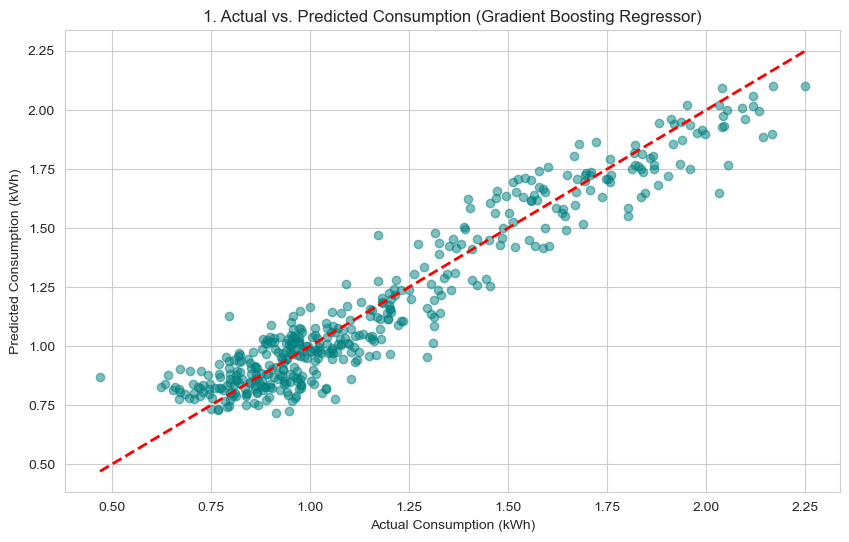

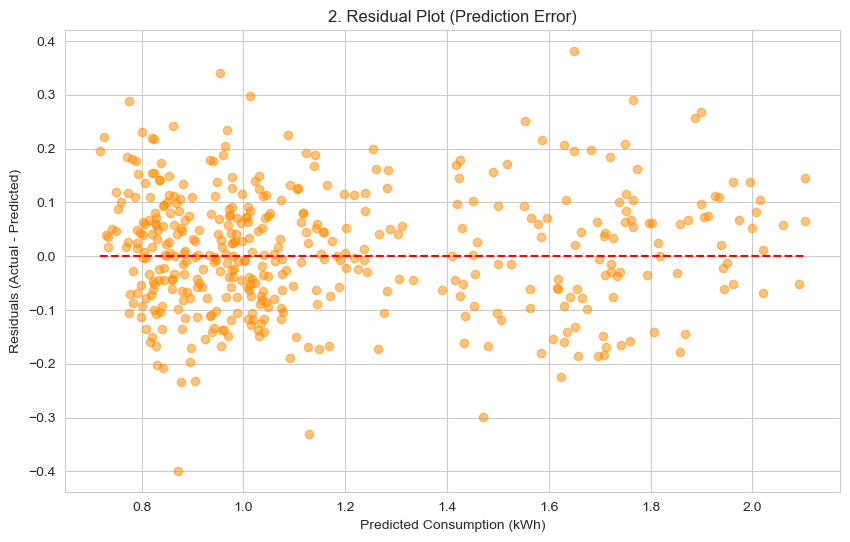


--- Feature Importance for Gradient Boosting Regressor ---

Top 5 Feature Importances (Higher is more impactful):
|                     |      0 |
|:--------------------|-------:|
| appliances_on_score | 0.4835 |
| outdoor_temp_c      | 0.4564 |
| is_weekend_1        | 0.0304 |
| is_holiday_1        | 0.0104 |
| humidity_pct        | 0.0103 |


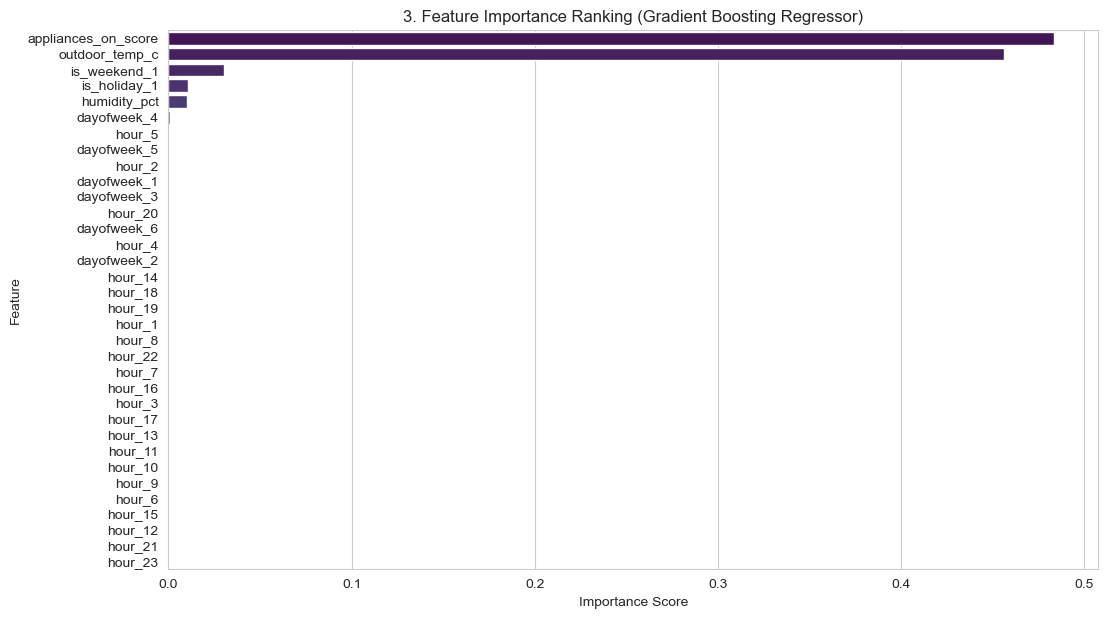

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress minor warnings for cleaner output
warnings.filterwarnings("ignore")

# Set plotting style
sns.set_style("whitegrid")

# Define categorical features that require one-hot encoding
# Even though these are stored as numbers, they represent distinct categories (like 0 vs 1)
CATEGORICAL_FEATURES = ['hour', 'dayofweek', 'is_weekend', 'is_holiday']
TARGET_COLUMN = 'consumption_kwh'

# 1. Load the dataset
try:
    df = pd.read_csv('Household_Power_Consumption_Prediction.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Household_Power_Consumption_Prediction.csv not found.")
    exit()

# 2. Data Preprocessing and Feature Engineering

# Handle Missing Values (Imputation)
if df.isnull().values.any():
    print("\nWarning: Missing values detected. Filling with median.")
    for col in df.select_dtypes(include=np.number).columns:
        df[col].fillna(df[col].median(), inplace=True)
else:
    print("\nNo missing values found.")

# Drop the 'timestamp' column as its information is already extracted into 'hour' etc.
df_processed = df.drop('timestamp', axis=1)

# Apply One-Hot Encoding to categorical features
# This creates new binary columns for each category (e.g., 'hour_2', 'dayofweek_6')
# drop_first=True prevents multicollinearity
X_encoded = pd.get_dummies(df_processed.drop(TARGET_COLUMN, axis=1), 
                          columns=CATEGORICAL_FEATURES, 
                          drop_first=True)

y = df_processed[TARGET_COLUMN]

# Identify numerical features after encoding (these need scaling)
NUMERICAL_FEATURES = X_encoded.columns.difference(
    [col for col in X_encoded.columns if any(cat in col for cat in CATEGORICAL_FEATURES)]
).tolist()

# 3. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 4. Feature Scaling (Crucial for Linear Regression and overall optimization)
scaler = StandardScaler()
X_train[NUMERICAL_FEATURES] = scaler.fit_transform(X_train[NUMERICAL_FEATURES])
X_test[NUMERICAL_FEATURES] = scaler.transform(X_test[NUMERICAL_FEATURES])

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Total features after encoding and scaling: {X_train.shape[1]}")

# 5. Model Training and Evaluation

# Dictionary to hold the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        max_depth=15,
        min_samples_split=5
    ),
    "Gradient Boosting Regressor": GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}

results = {}

print("\n--- Training and Evaluating Models ---")

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "R2": r2, "y_pred": y_pred}
    
    print(f"{name} complete. MAE: {mae:.4f}, R2: {r2:.4f}")

# 6. Comparative Summary and Selection of Best Model
print("\n" + "="*50)
print("             COMPARATIVE MODEL PERFORMANCE")
print("="*50)

results_df = pd.DataFrame({k: v for k, v in results.items()}).T
results_df = results_df.drop('y_pred', axis=1)
results_df_sorted = results_df.sort_values(by="R2", ascending=False)

print(results_df_sorted.to_markdown(floatfmt=".4f"))
print("="*50)

# Determine the best model for visualization
best_model_name = results_df_sorted.index[0]
best_model = models[best_model_name]
best_y_pred = results[best_model_name]["y_pred"]

# 7. Model Visualization (using the Best Model)
print(f"\n--- Generating Visualizations for {best_model_name} ---")

# --- Plot 1: Actual vs. Predicted Consumption ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_y_pred, alpha=0.5, color='teal')
# Draw a perfect prediction line (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'1. Actual vs. Predicted Consumption ({best_model_name})')
plt.xlabel('Actual Consumption (kWh)')
plt.ylabel('Predicted Consumption (kWh)')
plt.show() 

# --- Plot 2: Residual Plot ---
residuals = y_test - best_y_pred
plt.figure(figsize=(10, 6))
# Plot residuals against predicted values
plt.scatter(best_y_pred, residuals, alpha=0.5, color='darkorange')
plt.hlines(0, best_y_pred.min(), best_y_pred.max(), colors='red', linestyles='--')
plt.title(f'2. Residual Plot (Prediction Error)')
plt.xlabel('Predicted Consumption (kWh)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show() 

# --- Plot 3: Feature Importance Bar Chart (if not Linear Regression) ---
if best_model_name != "Linear Regression":
    print(f"\n--- Feature Importance for {best_model_name} ---")
    
    # Use the column names from the processed training data
    feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
    feature_importances_sorted = feature_importances.sort_values(ascending=False)
    
    print("\nTop 5 Feature Importances (Higher is more impactful):")
    print(feature_importances_sorted.head().to_markdown(floatfmt=".4f"))

    plt.figure(figsize=(12, 7))
    sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette="viridis")
    plt.title(f'3. Feature Importance Ranking ({best_model_name})')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

Dataset loaded successfully.

--- CLASSIFICATION: WEEKDAY vs. WEEKEND CONSUMPTION ---
|   is_weekend |   Average_Consumption_kWh | Period   |
|-------------:|--------------------------:|:---------|
|            0 |                    1.0931 | Weekday  |
|            1 |                    1.3178 | Weekend  |


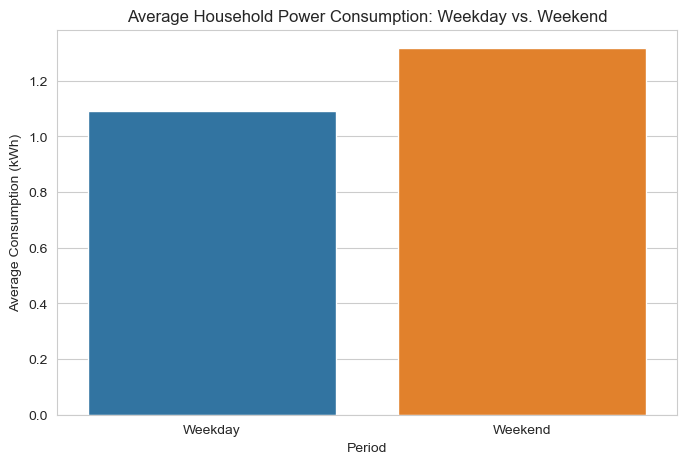


No missing values found.

Training set size: 1728 samples
Testing set size: 432 samples
Total features after encoding and scaling: 34

--- Training and Evaluating Models ---

Training Linear Regression...
Linear Regression complete. MAE: 0.0963, R2: 0.9003

Training Random Forest Regressor...
Random Forest Regressor complete. MAE: 0.0925, R2: 0.9101

Training Gradient Boosting Regressor...
Gradient Boosting Regressor complete. MAE: 0.0897, R2: 0.9143

             COMPARATIVE MODEL PERFORMANCE
|                             |    MAE |     R2 |
|:----------------------------|-------:|-------:|
| Gradient Boosting Regressor | 0.0897 | 0.9143 |
| Random Forest Regressor     | 0.0925 | 0.9101 |
| Linear Regression           | 0.0963 | 0.9003 |

--- Generating Visualizations for Gradient Boosting Regressor ---


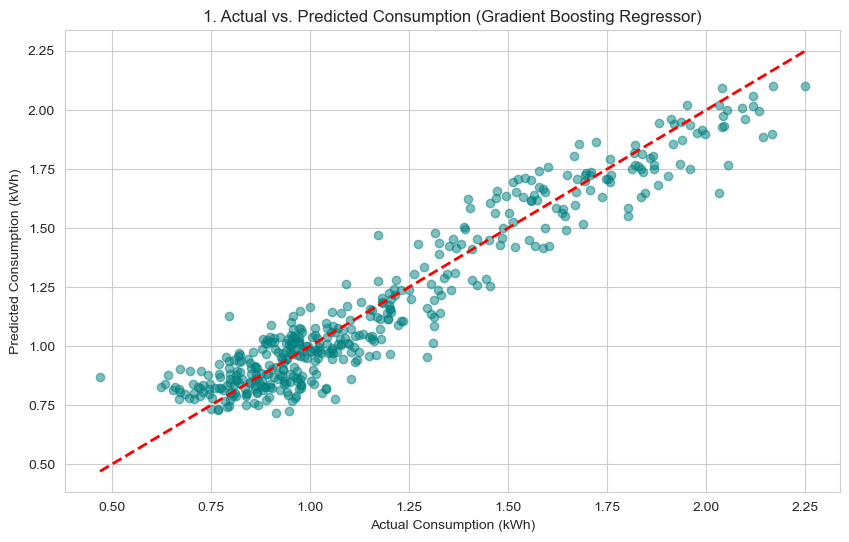

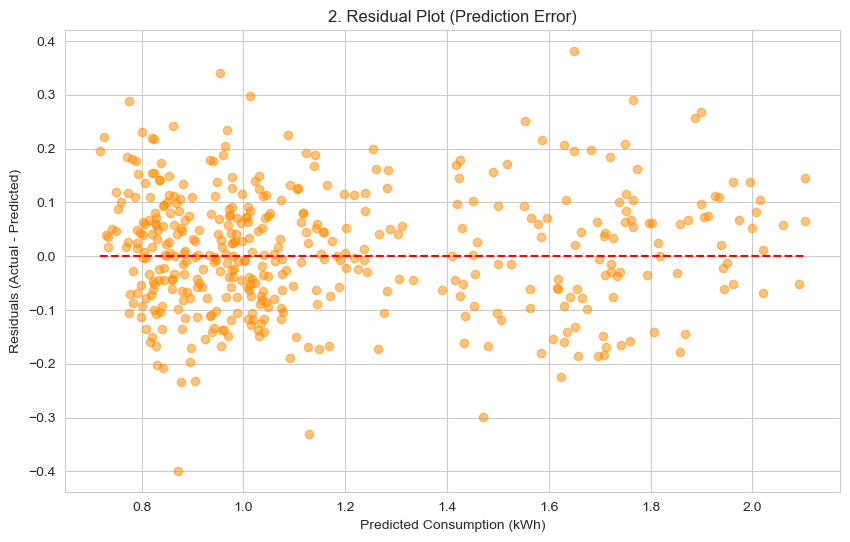


--- Feature Importance for Gradient Boosting Regressor ---

Top 5 Feature Importances (Higher is more impactful):
|                     |      0 |
|:--------------------|-------:|
| appliances_on_score | 0.4835 |
| outdoor_temp_c      | 0.4564 |
| is_weekend_1        | 0.0304 |
| is_holiday_1        | 0.0104 |
| humidity_pct        | 0.0103 |


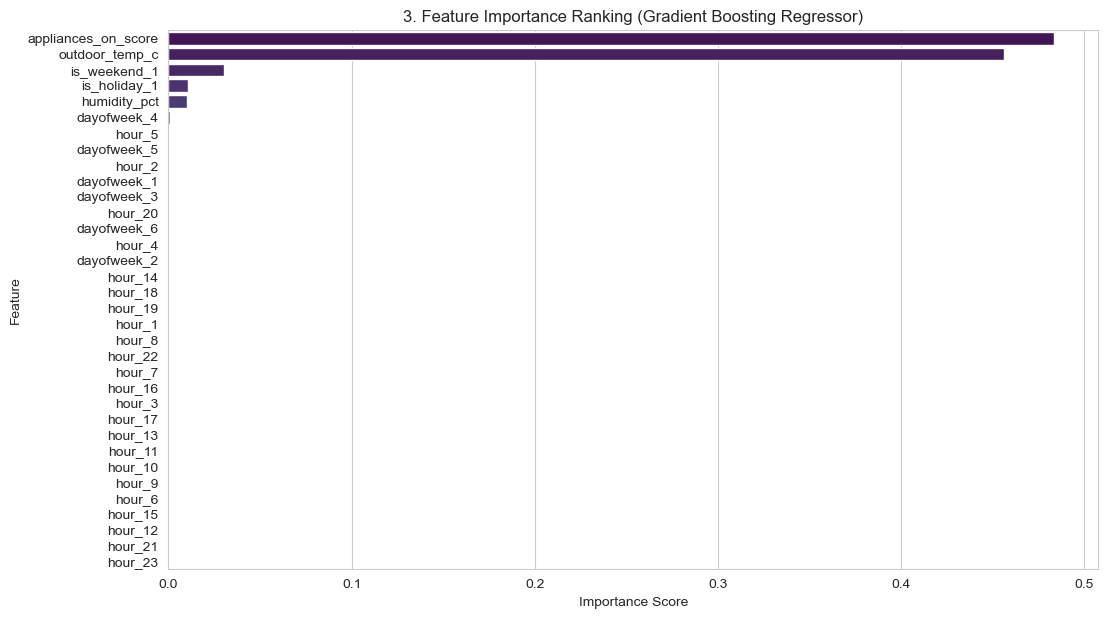

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress minor warnings for cleaner output
warnings.filterwarnings("ignore")

# Set plotting style
sns.set_style("whitegrid")

# Define categorical features that require one-hot encoding
CATEGORICAL_FEATURES = ['hour', 'dayofweek', 'is_weekend', 'is_holiday']
TARGET_COLUMN = 'consumption_kwh'

# 1. Load the dataset
try:
    df = pd.read_csv('Household_Power_Consumption_Prediction.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Household_Power_Consumption_Prediction.csv not found.")
    exit()

# --- NEW STEP: Classification Analysis (Average Consumption) ---
print("\n--- CLASSIFICATION: WEEKDAY vs. WEEKEND CONSUMPTION ---")

# Calculate average consumption grouped by the 'is_weekend' column
weekend_avg = df.groupby('is_weekend')[TARGET_COLUMN].mean().reset_index()
weekend_avg['Period'] = weekend_avg['is_weekend'].apply(lambda x: 'Weekend' if x == 1 else 'Weekday')
weekend_avg.rename(columns={TARGET_COLUMN: 'Average_Consumption_kWh'}, inplace=True)

print(weekend_avg.to_markdown(index=False, floatfmt=".4f"))

# Plot the average consumption
plt.figure(figsize=(8, 5))
sns.barplot(x='Period', y='Average_Consumption_kWh', data=weekend_avg, palette=['#1f77b4', '#ff7f0e'])
plt.title('Average Household Power Consumption: Weekday vs. Weekend')
plt.xlabel('Period')
plt.ylabel('Average Consumption (kWh)')
plt.show()
# --- END NEW STEP ---

# 2. Data Preprocessing and Feature Engineering

# Handle Missing Values (Imputation)
if df.isnull().values.any():
    print("\nWarning: Missing values detected. Filling with median.")
    for col in df.select_dtypes(include=np.number).columns:
        df[col].fillna(df[col].median(), inplace=True)
else:
    print("\nNo missing values found.")

# Drop the 'timestamp' column as its information is already extracted into 'hour' etc.
df_processed = df.drop('timestamp', axis=1)

# Apply One-Hot Encoding to categorical features
X_encoded = pd.get_dummies(df_processed.drop(TARGET_COLUMN, axis=1), 
                          columns=CATEGORICAL_FEATURES, 
                          drop_first=True)

y = df_processed[TARGET_COLUMN]

# Identify numerical features after encoding (these need scaling)
NUMERICAL_FEATURES = X_encoded.columns.difference(
    [col for col in X_encoded.columns if any(cat in col for cat in CATEGORICAL_FEATURES)]
).tolist()

# 3. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 4. Feature Scaling (Crucial for Linear Regression and overall optimization)
scaler = StandardScaler()
X_train[NUMERICAL_FEATURES] = scaler.fit_transform(X_train[NUMERICAL_FEATURES])
X_test[NUMERICAL_FEATURES] = scaler.transform(X_test[NUMERICAL_FEATURES])

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Total features after encoding and scaling: {X_train.shape[1]}")

# 5. Model Training and Evaluation

# Dictionary to hold the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        max_depth=15,
        min_samples_split=5
    ),
    "Gradient Boosting Regressor": GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}

results = {}

print("\n--- Training and Evaluating Models ---")

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "R2": r2, "y_pred": y_pred}
    
    print(f"{name} complete. MAE: {mae:.4f}, R2: {r2:.4f}")

# 6. Comparative Summary and Selection of Best Model
print("\n" + "="*50)
print("             COMPARATIVE MODEL PERFORMANCE")
print("="*50)

results_df = pd.DataFrame({k: v for k, v in results.items()}).T
results_df = results_df.drop('y_pred', axis=1)
results_df_sorted = results_df.sort_values(by="R2", ascending=False)

print(results_df_sorted.to_markdown(floatfmt=".4f"))
print("="*50)

# Determine the best model for visualization
best_model_name = results_df_sorted.index[0]
best_model = models[best_model_name]
best_y_pred = results[best_model_name]["y_pred"]

# 7. Model Visualization (using the Best Model)
print(f"\n--- Generating Visualizations for {best_model_name} ---")

# --- Plot 1: Actual vs. Predicted Consumption ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_y_pred, alpha=0.5, color='teal')
# Draw a perfect prediction line (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'1. Actual vs. Predicted Consumption ({best_model_name})')
plt.xlabel('Actual Consumption (kWh)')
plt.ylabel('Predicted Consumption (kWh)')
plt.show() 

# --- Plot 2: Residual Plot ---
residuals = y_test - best_y_pred
plt.figure(figsize=(10, 6))
# Plot residuals against predicted values
plt.scatter(best_y_pred, residuals, alpha=0.5, color='darkorange')
plt.hlines(0, best_y_pred.min(), best_y_pred.max(), colors='red', linestyles='--')
plt.title(f'2. Residual Plot (Prediction Error)')
plt.xlabel('Predicted Consumption (kWh)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show() 

# --- Plot 3: Feature Importance Bar Chart (if not Linear Regression) ---
if best_model_name != "Linear Regression":
    print(f"\n--- Feature Importance for {best_model_name} ---")
    
    # Use the column names from the processed training data
    feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
    feature_importances_sorted = feature_importances.sort_values(ascending=False)
    
    print("\nTop 5 Feature Importances (Higher is more impactful):")
    print(feature_importances_sorted.head().to_markdown(floatfmt=".4f"))

    plt.figure(figsize=(12, 7))
    sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette="viridis")
    plt.title(f'3. Feature Importance Ranking ({best_model_name})')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()